In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Pandas Settings:
set max rows/cols diusplayed in printed dataframe  
suppress SetWithCopy chained assignment warning

In [2]:

# un-comment to view all rows of data frame
# uses lots pf ram!!!
# pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option("display.max_rows", 40, "display.max_columns", 40)


pd.options.mode.chained_assignment = None  # default='warn'


#pd.read_csv("orders.csv") #zentail sales data - does not include title
#pd.read_csv('1717.csv') #another data fetch? has sku, package/shipping info

In [3]:
sales['Sale Date'][0]

NameError: name 'sales' is not defined

In [4]:
sales = pd.read_csv('SalesReport.csv')
data = sales[['Sale Date', 'Status', 'Channel','Marketplace','SKU','Title', 'Sold Quantity', 'Sold Price',
 'Kit?','Pending', 'FBA Fulfillment Fees']]

#convert string timestamps to datetime objects, and make a column denoting day
data['Sale Date'] = pd.to_datetime(data.iloc[:,0])
data['Day'] = data['Sale Date'].dt.floor('D')


data['Sold Price'] = data["Sold Price"].str.replace('$','').astype(float)


data.head()



,Sale Date,Status,Channel,Marketplace,SKU,Title,Sold Quantity,Sold Price,Kit?,Pending,FBA Fulfillment Fees,Day
0,2020-01-01 02:23:00,Completed,NaN,Api,39665A-39666A-16-2,Samsung UN65JU6500FXZA LED Backlight Strip Set...,1,39.95,Yes,0,$0,2020-01-01
1,2020-01-01 02:27:00,Completed,NaN,Api,RTU4300-USED,RCA RTU4300 Stand Legs W/Screws - Used,1,29.95,NaN,0,$0,2020-01-01
2,2020-01-01 02:40:00,Completed,NaN,Api,EAD61273133-NEW,OEM Genuine LG AV Adapter Cable Accessory - E...,1,7.50,NaN,0,$0,2020-01-01
3,2020-01-01 02:40:00,Completed,NaN,Api,EAD61273134-NEW,OEM Genuine LG AV Adapter Cable Accessory - E...,1,5.50,NaN,3,$0,2020-01-01
4,2020-01-01 08:58:00,Completed,NaN,Api,BN59-01220D-NEW,Samsung UN55JU6700FXZA UN65JS9000FXZA Remote B...,1,79.95,NaN,0,$0,2020-01-01


In [5]:
brands = ['Samsung','LG','Sony','Vizio','Westinghouse','TCL','Element','JVC','Philips','Onn','RCA','Hisense','Insignia']

notitleidx = []
for idx, listing in enumerate(data['Title']):
    for brand in brands:
        try:
            if brand in listing:
                
                continue
        except TypeError:
            notitleidx.append(idx)
            break
            
nobrand = data.iloc[notitleidx,:]
#nobrand['Sold Price'].str.replace('$','').astype(float).sum()
data['Sold Price'].sum()

904589.0700000001

In [6]:
pd.isna(nobrand['Sold Price'])#.iloc[1,5] == 'nan'

40       False
59       False
87       False
99       False
126      False
         ...  
21117    False
21570    False
21737    False
22039    False
22304    False
Name: Sold Price, Length: 187, dtype: bool

In [7]:
hotseller = data[data['Title'].str.contains('791.01C10.0003', na=False)]


In [8]:
hotseller.groupby()

TypeError: You have to supply one of 'by' and 'level'

'791.01C10.0003'

In [10]:
daysales = (hotseller['Sale Date'].dt.floor('d')).value_counts()
weeksales = (hotseller['Sale Date'].dt.floor('7d')).value_counts()

In [11]:
#daysales.sort_values()
weeksales.sort_values()

start = daysales.index.min()
end = daysales.index.max()

start = daysales.index.min()
end = daysales.index.max()

idx = pd.date_range(start,end)
idxw = pd.date_range(start,end,freq='W')


daysales = daysales.reindex(idx, fill_value=0)
weeksales = weeksales.reindex(idxw,fill_value=0)

In [12]:
daysales.sort_index()

2020-02-20    1
2020-02-21    0
2020-02-22    0
2020-02-23    1
2020-02-24    1
             ..
2020-08-17    3
2020-08-18    1
2020-08-19    0
2020-08-20    3
2020-08-21    1
Freq: D, Name: Sale Date, Length: 184, dtype: int64

In [13]:
idxw

DatetimeIndex(['2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15',
               '2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12',
               '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10',
               '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
               '2020-06-14', '2020-06-21', '2020-06-28', '2020-07-05',
               '2020-07-12', '2020-07-19', '2020-07-26', '2020-08-02',
               '2020-08-09', '2020-08-16'],
              dtype='datetime64[ns]', freq='W-SUN')

Text(0.5, 1.0, 'Daily 791.01C10.0003 Sales')

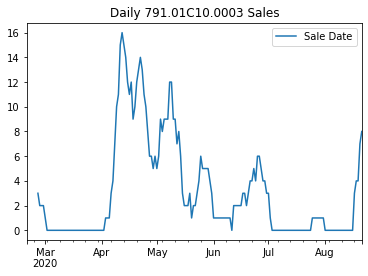

In [33]:
# 7-Day Rolling Sum of sales 

x = pd.DataFrame(daysales.index)

y = pd.DataFrame(daysales)

r = y.rolling(7).sum().sort_index().plot()
hotsku = hotseller['SKU'].iloc[0]

plt.title('Daily {0} Sales'.format(hotsku))



#plt.scatter(y.index,r)

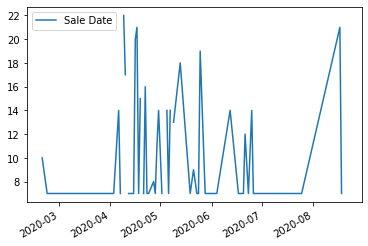

In [126]:
r.sort_index().plot()

In [16]:
pd.to_datetime(sales['Sale Date'])

0       2020-01-01 02:23:00
1       2020-01-01 02:27:00
2       2020-01-01 02:40:00
3       2020-01-01 02:40:00
4       2020-01-01 08:58:00
                ...        
22441   2020-08-21 16:06:00
22442   2020-08-21 16:06:00
22443   2020-08-21 16:14:00
22444   2020-08-21 16:17:00
22445   2020-08-21 16:15:00
Name: Sale Date, Length: 22446, dtype: datetime64[ns]

In [112]:
(hotseller['Sale Date'].dt.floor('D')).value_counts()

2020-04-11    4
2020-08-20    3
2020-04-20    3
2020-05-08    3
2020-05-03    3
             ..
2020-04-07    1
2020-02-23    1
2020-08-21    1
2020-04-12    1
2020-05-02    1
Name: Sale Date, Length: 54, dtype: int64

In [25]:
sales.columns

Index(['Sale ID', 'Order ID', 'Sale Date', 'Status', 'Channel', 'Marketplace',
       'SKU', 'Code', 'MPN', 'Title', 'Sold Quantity', 'Sold Price',
       'Cost of Goods', 'Profit', 'Margin', 'Markup', 'Kit?', '3PL?',
       'Pending', 'On Hand', 'Available', 'Incoming', 'FBA Fulfillment Fees'],
      dtype='object')